In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

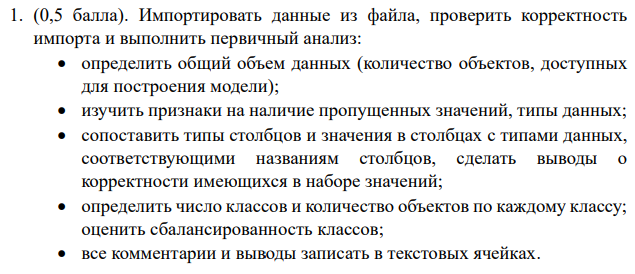

In [3]:
data = pd.read_csv('dataset.csv')
data.head()

,ID клиента,Возраст,Цель поездки,Класс обслуживания,Уровень удовлетворенности онлайн-регистрацией на рейс,Уровень удовлетворенности обслуживанием в полете,Задержка отправления (мин),Задержка прибытия (мин),Уровень удовлетворенности временем отправления и прибытия,Уровень удовлетворенности клиента
0,11996,52.0,Частная,Эконом,0,4,0,0.0,5,Удовлетворен
1,63021,30.0,Деловая,Бизнес,5,5,2,0.0,1,Удовлетворен
2,104939,40.0,Деловая,Бизнес,5,5,3,0.0,1,Удовлетворен
3,59058,71.0,Деловая,Эконом,2,2,3,11.0,2,Не удовлетворен
4,13113,25.0,Деловая,Эконом,3,1,2,0.0,4,Не удовлетворен


In [4]:
rows, cols = data.shape 
print(f'Количество cтрок: {rows}')
print(f'Количество колонок: {cols}')

Количество cтрок: 1000
Количество колонок: 10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   ID клиента                                                 1000 non-null   int64  
 1   Возраст                                                    897 non-null    float64
 2   Цель поездки                                               985 non-null    object 
 3   Класс обслуживания                                         1000 non-null   object 
 4   Уровень удовлетворенности онлайн-регистрацией на рейс      1000 non-null   int64  
 5   Уровень удовлетворенности обслуживанием в полете           1000 non-null   int64  
 6   Задержка отправления (мин)                                 1000 non-null   int64  
 7   Задержка прибытия (мин)                                    1000 non-null   float64
 8   Уровень удовле

In [6]:
data.isnull().sum()

ID клиента                                                     0
Возраст                                                      103
Цель поездки                                                  15
Класс обслуживания                                             0
Уровень удовлетворенности онлайн-регистрацией на рейс          0
Уровень удовлетворенности обслуживанием в полете               0
Задержка отправления (мин)                                     0
Задержка прибытия (мин)                                        0
Уровень удовлетворенности временем отправления и прибытия      0
Уровень удовлетворенности клиента                              0
dtype: int64

ID клиента - int64 - правильно  
Возраст - float64 - правильно
Цель поездки - object(str) -  правильно
Класс обслуживания - object - правильно
Уровень удовлетворенности онлайн-регистрацией на рейс -   int64 - правильно  
Уровень удовлетворенности обслуживанием в полете - int64 - правильно  
Задержка отправления (мин) - int64 - **ВОЗМОЖНО неправильно, т.к. ВСЕ клиенты не могут задержаться на ровно целое число секунд или это слишком маловероятно**  
Задержка прибытия (мин) - float64 - **ВОЗМОЖНО также не правильно так как все значения могут быть целыми**
Уровень удовлетворенности временем отправления и прибытия - int64  - верно
Уровень удовлетворенности клиента - object - верно 

Пропуски есть в столбце "Возраст"(10.3%) и "Цель поездки"(0.15%). Эти пропуски в дальнейшем нужно обработать: Для возраста можно испольовать среднее знч.\медиану, для цели поездки - модой, или удалением строк, т.к. их очень мало 

In [7]:
check_cols = ["Цель поездки", "Класс обслуживания", "Уровень удовлетворенности клиента"]
for col in check_cols:
    print(f'Уникальные значение для "{col}"', data[col].unique())
    
print('Всё ли дробь в "Задержка прибытия":', (data['Задержка прибытия (мин)'] % 1 != 0).sum())
print('Всё ли дробь в "Возраст":', (data['Возраст'] % 1 != 0).sum())
    

Уникальные значение для "Цель поездки" ['Частная' 'Деловая' nan]
Уникальные значение для "Класс обслуживания" ['Эконом' 'Бизнес' 'Комфорт']
Уникальные значение для "Уровень удовлетворенности клиента" ['Удовлетворен' 'Не удовлетворен']
Всё ли дробь в "Задержка прибытия": 0
Всё ли дробь в "Возраст": 103


Вывод:

- Уникальные значение для "Цель поездки" ['Частная' 'Деловая' nan] -> Значения логичны, но пропуски нужно обработать
- Уникальные значение для "Класс обслуживания" ['Эконом' 'Бизнес' 'Комфорт'] -> Всё корректно
- Уникальные значение для "Уровень удовлетворенности клиента" ['Удовлетворен' 'Не удовлетворен'] -> Всё корректно
- Всё ли дробь в "Задержка прибытия": 0 -- сл-но аномалия, так как заявлена дробное значение а все ячейки целые числа
- Всё ли дробь в "Возраст": 103 -- сл-но все нормально, возраст удовлетворяет условию типа данных колонки

In [8]:
print(10 % 1 == 0, 10 % 1)
print(10.5 % 1 == 0, 10.5 % 1)
print(10.5 / 1 == 0, 10.5 / 1)
print(10.5 // 1 == 0, 10.5 // 1)

True 0
False 0.5
False 10.5
False 10.0


## 5. Определение числа классов и их распределение

In [9]:
classes_cols = ["Цель поездки", "Класс обслуживания", "Уровень удовлетворенности клиента"]
for col in classes_cols:
    class_counts = data[col].value_counts()
    display(class_counts)

    # сбалансированность
    class_prop =  class_counts / class_counts.sum()
    print('Доля кадого класса:')
    display(class_prop)

Цель поездки
Деловая    717
Частная    268
Name: count, dtype: int64

Доля кадого класса:


Цель поездки
Деловая    0.727919
Частная    0.272081
Name: count, dtype: float64

Класс обслуживания
Бизнес     519
Эконом     414
Комфорт     67
Name: count, dtype: int64

Доля кадого класса:


Класс обслуживания
Бизнес     0.519
Эконом     0.414
Комфорт    0.067
Name: count, dtype: float64

Уровень удовлетворенности клиента
Удовлетворен       500
Не удовлетворен    500
Name: count, dtype: int64

Доля кадого класса:


Уровень удовлетворенности клиента
Удовлетворен       0.5
Не удовлетворен    0.5
Name: count, dtype: float64

## 3 пункт - сопоставление типов и значений

**Что делаю**: Проверяю уникальные значения категориальных столбцов, чтобы убедиться, что они соответствуют ожиданиям. Также проверяю, есть ли дробные значения в столбцах Возраст и Задержка прибытия, чтобы оценить корректность их типов данных.

Цель поездки  ~73%-деловая ~27%-частная. Классы не сбалансированны, что не подойдет для моделирования. Большое отклонение, сл-но требуется методы балансировки

Класс обслуживания - 52%-бизнес 41%-Эконом 7%-комфорт - классы не сбалансирован, возможно потребуется балансировка

Уровень удовлетворенности клиента - 50%-удовлетворен, 50%-не удовлетворен - класс полностью сбалансирован

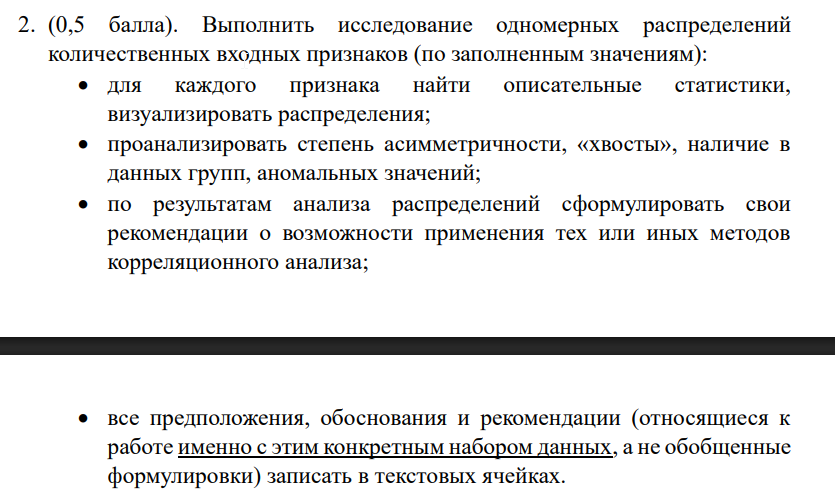

Количественными параметрами являются ["Возраст", "Задержка отправления(мин)", "Задержка прибытия(мин)"]

In [10]:
counts_colums = ["Возраст", "Задержка прибытия (мин)", "Задержка отправления (мин)"]

In [11]:
data[counts_colums].describe()

,Возраст,Задержка прибытия (мин),Задержка отправления (мин)
count,897.000000,1000.000000,1000.000000
mean,40.096990,16.872000,16.293000
std,14.841069,45.350439,44.163147
min,7.000000,0.000000,0.000000
25%,29.000000,0.000000,0.000000
50%,40.000000,0.000000,0.000000
75%,51.000000,14.000000,12.000000
max,80.000000,518.000000,450.000000


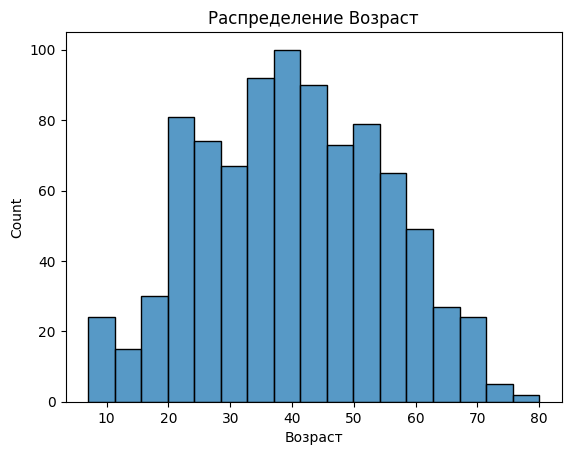

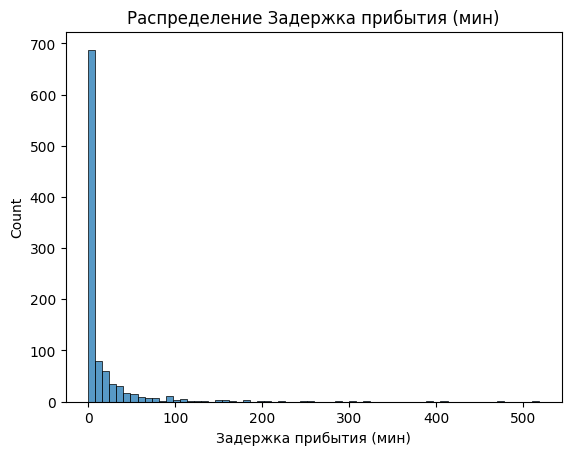

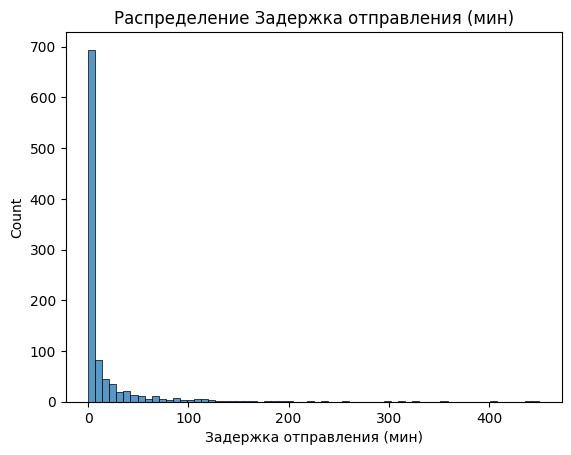

In [12]:
for col in counts_colums:
    sns.histplot(data[col])
    plt.title(f"Распределение {col}")
    plt.xlabel(f"{col}")
    plt.show()

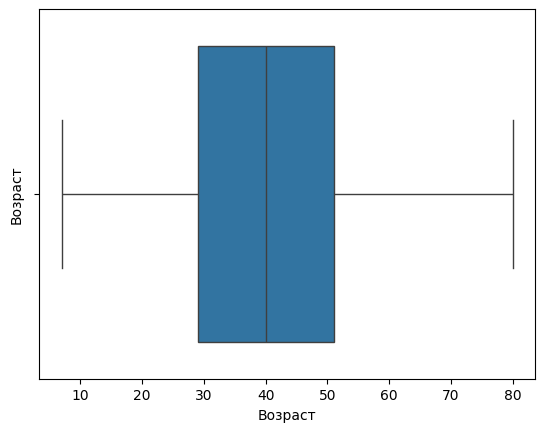

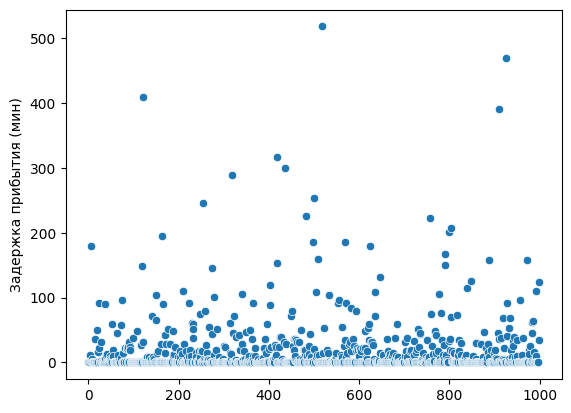

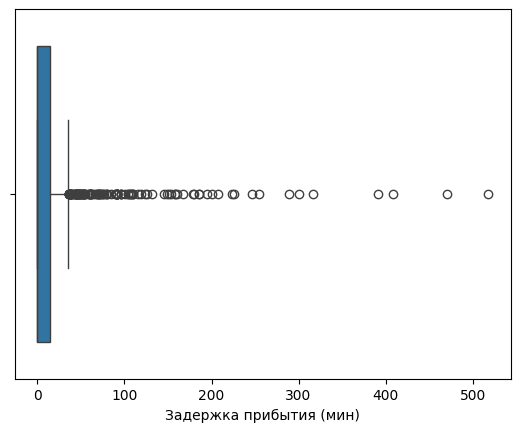

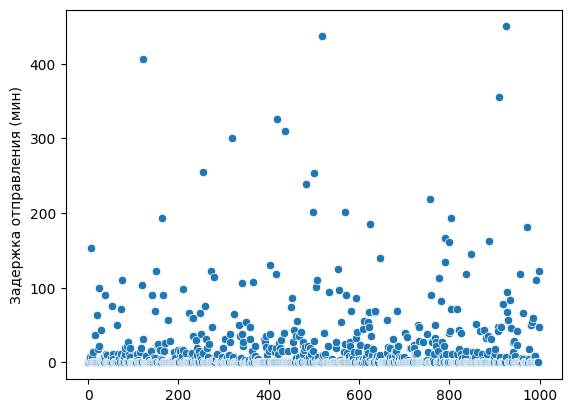

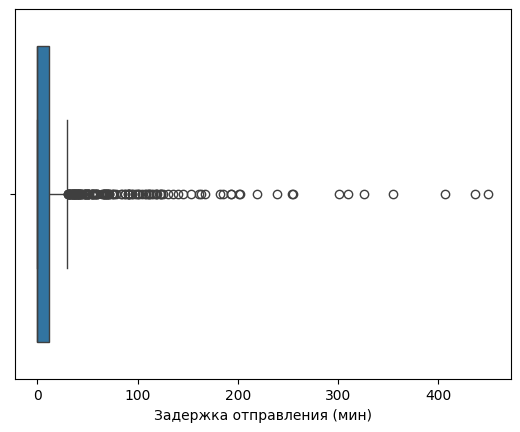

In [13]:
sns.boxplot(data["Возраст"], orient='y')
plt.ylabel(f"Возраст")
plt.show()
for col in counts_colums[1:]:
    sns.scatterplot(data[col])
    plt.ylabel(f"{col}")
    plt.show()
    sns.boxplot(data[col], orient='y')
    plt.xlabel(f"{col}")
    plt.show()

## Возраст

Медиана находится примерно на уровне 30–40 лет . Это центральное значение распределения.

Если судить по боксблоту то
- Медиана находится в рйоне 40 лет
- Первый квартиль (Q1) находится около 20–30 лет
- Третий квартиль (Q3) находится около 40–50 лет

Ассимтрия: 
- Распределение имеет правостороннюю ассиметрию(положительную). Это видно по тому, что верхний ус длинее нижнего. 

Выбросы:
- Отсутствуют

Выводы:
- Возраст распределен равномерно, с большой концентрацией в молодом и среднем возрасте
- Присутствует правосторонняя ассиметрия
- От выбросов очищать не нужно

Рекомендации:
- Для кореляции можно использовать метод Пирсона

## Задержка прибытия (мин)

Болшенство значений находится в районе 0-5 минут. Это видно по плотной концентрации на гистрограмме, по оси Y

Есть значительные выбросы которые значительно отличаются от основной массы данных. От 40 и выше минут считается выбросами и сильно выделяются на фоне основного распределения

Ассимтрия: 
- Распределение имеет правостороннюю ассиметрию(положительную). Так как большинство значений находится в левой части гистограммы, а длинный хвост присутствует в правой части

Выбросы:
- Много выбросов от 40 минут и выше

Выводы:
- Задержки прибытия имеют высокую вариантивность
- Присутствуют значитльные выбросы, которые могут искажать анализ данных
- Распределение сильно ассиметрично

Рекомендации:
- Удалить выбросы от 40 минут
- Из за наличия ассиметрии рекомендуется использовать корреляцию Спирмена вместо Пирсона

# [Теория] Какую кореляцию выбрать и в каких случаях

Корреляция - это взаимосвязь между различными показателями в статистике. Она показывает насколько изменени одной переменной влияет на изменение другой.

# Основные методы

## Корреляция Пирсона
- Мера линейной связи между 2 переменными 
- Диапазон значений от -1(Полная обратная зависимость) до +1(Полная прямая зависимость)

Когда использовать? 

1) Данные имеют нормальное распределение
2) Предполагается линейная связь между переменными
3) Нет выбросов или они уже обработаны

## Корреляция Спирмена
- Мера монотонной(не обязательно линейная) связи между 2 переменными, основанная на рангах
- Диапазон значений от -1(Полная обратная зависимость) до +1(Полная прямая зависимость)

Когда использовать? 

1) Данные не имеют нормальное распределение
2) Предполагается монотонная связь (убывает или возрастает), но не обязательно линейная
3) Присутствуют выбросы или аномальные значения

## Корреляция Кендала
- Мера согласованности порядков 2 переменных. Основана на подсчете пар, которые согласованы или несогласованы по порядку 
- Диапазон значений от -1(Полная обратная зависимость) до +1(Полная прямая зависимость)

Когда использовать? 

1) Данные содержат много повторяющися значения(ранговая корреляция)
2) Маленький размер выборки
3) Важна интерпритация согласованности порядков(например в категориальных данных) (другими словами показывает насколько две переменные "ведут себя одинакого" с точки зрения их ранжирования(ранга))


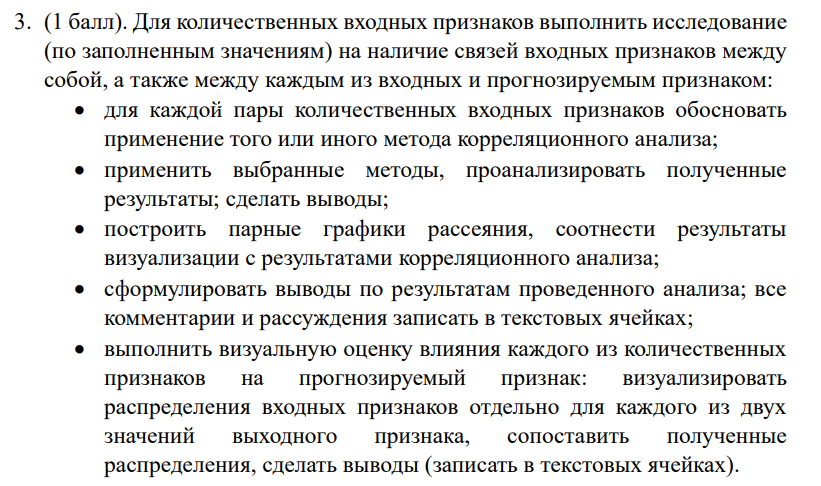

In [14]:
data.head()

,ID клиента,Возраст,Цель поездки,Класс обслуживания,Уровень удовлетворенности онлайн-регистрацией на рейс,Уровень удовлетворенности обслуживанием в полете,Задержка отправления (мин),Задержка прибытия (мин),Уровень удовлетворенности временем отправления и прибытия,Уровень удовлетворенности клиента
0,11996,52.0,Частная,Эконом,0,4,0,0.0,5,Удовлетворен
1,63021,30.0,Деловая,Бизнес,5,5,2,0.0,1,Удовлетворен
2,104939,40.0,Деловая,Бизнес,5,5,3,0.0,1,Удовлетворен
3,59058,71.0,Деловая,Эконом,2,2,3,11.0,2,Не удовлетворен
4,13113,25.0,Деловая,Эконом,3,1,2,0.0,4,Не удовлетворен


In [15]:
data.describe()

,ID клиента,Возраст,Уровень удовлетворенности онлайн-регистрацией на рейс,Уровень удовлетворенности обслуживанием в полете,Задержка отправления (мин),Задержка прибытия (мин),Уровень удовлетворенности временем отправления и прибытия
count,1000.000000,897.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,64669.480000,40.096990,3.30400,3.640000,16.293000,16.872000,3.014000
std,36975.879911,14.841069,1.36288,1.190722,44.163147,45.350439,1.539537
min,83.000000,7.000000,0.00000,1.000000,0.000000,0.000000,0.000000
25%,31915.750000,29.000000,2.00000,3.000000,0.000000,0.000000,2.000000
50%,65966.500000,40.000000,4.00000,4.000000,0.000000,0.000000,3.000000
75%,96103.500000,51.000000,4.00000,5.000000,12.000000,14.000000,4.000000
max,129528.000000,80.000000,5.00000,5.000000,450.000000,518.000000,5.000000


In [16]:
formated_data = data.copy()

formated_data["Уровень удовлетворенности клиента"] = formated_data[
    "Уровень удовлетворенности клиента"
].map({"Удовлетворен": 1, "Не удовлетворен": 0})


formated_data.head()

,ID клиента,Возраст,Цель поездки,Класс обслуживания,Уровень удовлетворенности онлайн-регистрацией на рейс,Уровень удовлетворенности обслуживанием в полете,Задержка отправления (мин),Задержка прибытия (мин),Уровень удовлетворенности временем отправления и прибытия,Уровень удовлетворенности клиента
0,11996,52.0,Частная,Эконом,0,4,0,0.0,5,1
1,63021,30.0,Деловая,Бизнес,5,5,2,0.0,1,1
2,104939,40.0,Деловая,Бизнес,5,5,3,0.0,1,1
3,59058,71.0,Деловая,Эконом,2,2,3,11.0,2,0
4,13113,25.0,Деловая,Эконом,3,1,2,0.0,4,0


In [17]:

quant_features = list(formated_data.describe().columns)
quant_features

['ID клиента',
 'Возраст',
 'Уровень удовлетворенности онлайн-регистрацией на рейс',
 'Уровень удовлетворенности обслуживанием в полете',
 'Задержка отправления (мин)',
 'Задержка прибытия (мин)',
 'Уровень удовлетворенности временем отправления и прибытия',
 'Уровень удовлетворенности клиента']

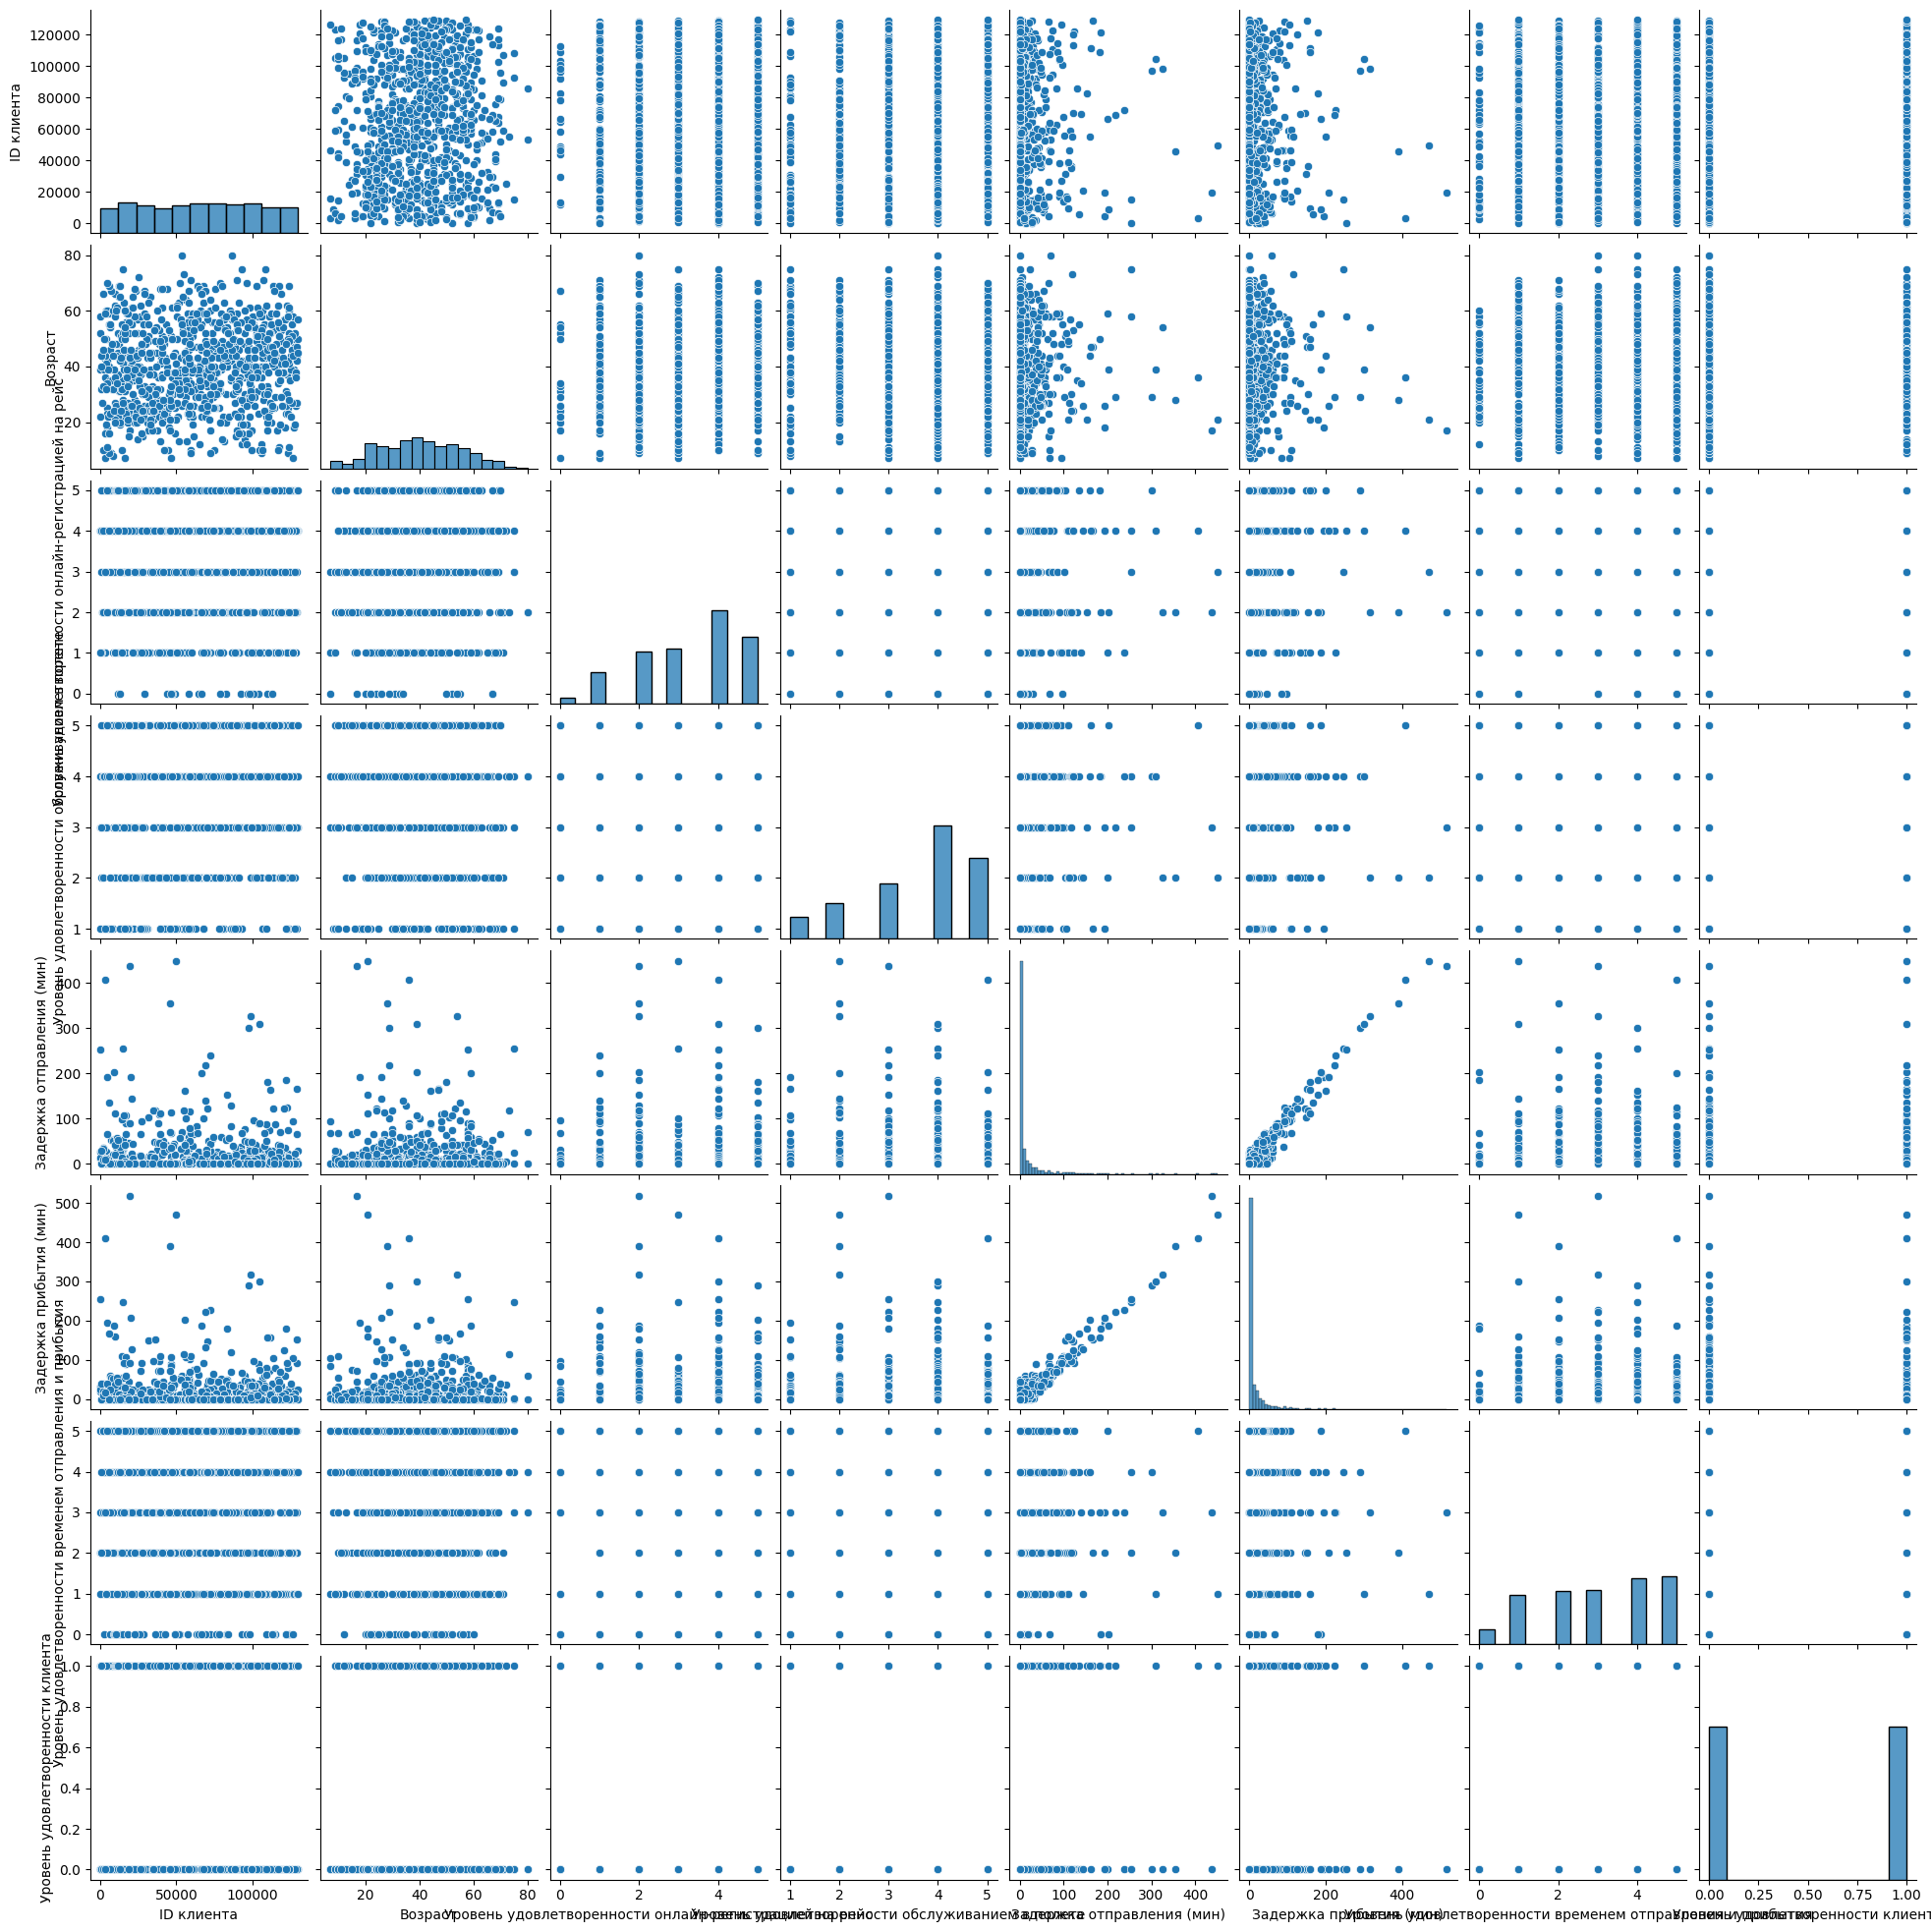

In [24]:
sns.pairplot(formated_data[quant_features])

# Пирсон

In [18]:
correlation_matrix_pearson = formated_data[quant_features].corr(method='pearson')
correlation_matrix_pearson

,ID клиента,Возраст,Уровень удовлетворенности онлайн-регистрацией на рейс,Уровень удовлетворенности обслуживанием в полете,Задержка отправления (мин),Задержка прибытия (мин),Уровень удовлетворенности временем отправления и прибытия,Уровень удовлетворенности клиента
ID клиента,1.000000,0.043720,0.075772,0.100647,-0.031511,-0.043591,-0.014540,0.046051
Возраст,0.043720,1.000000,0.165137,0.004333,-0.015351,-0.032028,0.054966,0.142871
Уровень удовлетворенности онлайн-регистрацией на рейс,0.075772,0.165137,1.000000,0.116236,-0.066375,-0.069934,0.111991,0.487447
Уровень удовлетворенности обслуживанием в полете,0.100647,0.004333,0.116236,1.000000,-0.062656,-0.074966,0.052443,0.322655
Задержка отправления (мин),-0.031511,-0.015351,-0.066375,-0.062656,1.000000,0.977785,-0.023617,-0.039532
Задержка прибытия (мин),-0.043591,-0.032028,-0.069934,-0.074966,0.977785,1.000000,-0.030498,-0.049021
Уровень удовлетворенности временем отправления и прибытия,-0.014540,0.054966,0.111991,0.052443,-0.023617,-0.030498,1.000000,-0.009098
Уровень удовлетворенности клиента,0.046051,0.142871,0.487447,0.322655,-0.039532,-0.049021,-0.009098,1.000000


<Axes: >

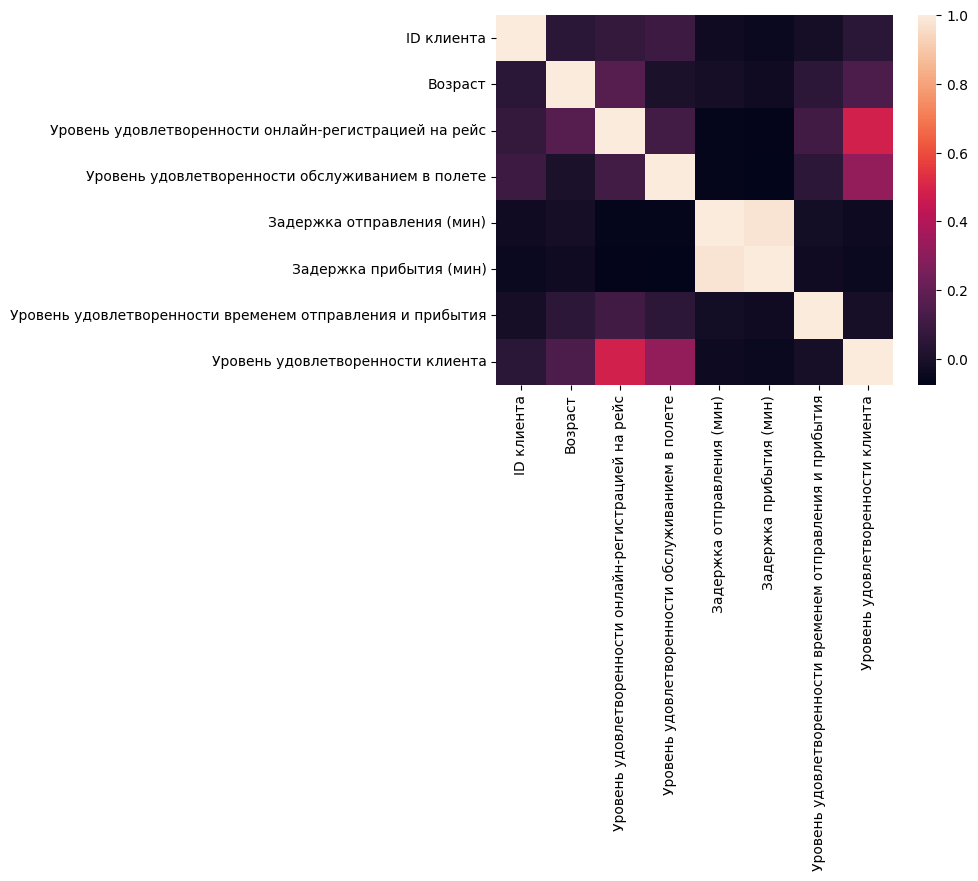

In [19]:
sns.heatmap(correlation_matrix_pearson)

# Спирман

In [21]:
correlation_matrix_spearman = formated_data[quant_features].corr(method='spearman')
correlation_matrix_spearman

,ID клиента,Возраст,Уровень удовлетворенности онлайн-регистрацией на рейс,Уровень удовлетворенности обслуживанием в полете,Задержка отправления (мин),Задержка прибытия (мин),Уровень удовлетворенности временем отправления и прибытия,Уровень удовлетворенности клиента
ID клиента,1.000000,0.052187,0.084643,0.078493,0.062144,0.009881,-0.017373,0.046405
Возраст,0.052187,1.000000,0.186282,0.028493,-0.010608,-0.015759,0.054421,0.164098
Уровень удовлетворенности онлайн-регистрацией на рейс,0.084643,0.186282,1.000000,0.147944,-0.055811,-0.098039,0.099316,0.533321
Уровень удовлетворенности обслуживанием в полете,0.078493,0.028493,0.147944,1.000000,-0.004950,-0.071110,0.055733,0.341388
Задержка отправления (мин),0.062144,-0.010608,-0.055811,-0.004950,1.000000,0.752087,-0.004031,-0.062834
Задержка прибытия (мин),0.009881,-0.015759,-0.098039,-0.071110,0.752087,1.000000,-0.004116,-0.105141
Уровень удовлетворенности временем отправления и прибытия,-0.017373,0.054421,0.099316,0.055733,-0.004031,-0.004116,1.000000,-0.004252
Уровень удовлетворенности клиента,0.046405,0.164098,0.533321,0.341388,-0.062834,-0.105141,-0.004252,1.000000


<Axes: >

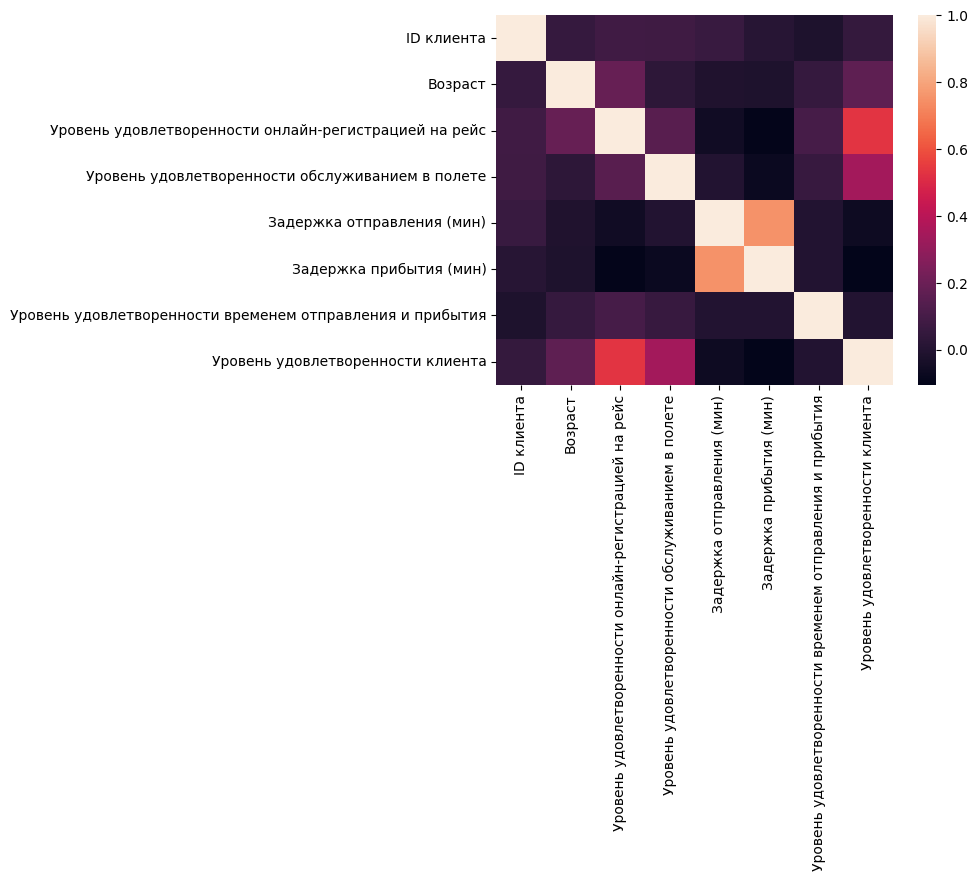

In [22]:
sns.heatmap(correlation_matrix_spearman)

In [23]:
quant_features

['ID клиента',
 'Возраст',
 'Уровень удовлетворенности онлайн-регистрацией на рейс',
 'Уровень удовлетворенности обслуживанием в полете',
 'Задержка отправления (мин)',
 'Задержка прибытия (мин)',
 'Уровень удовлетворенности временем отправления и прибытия',
 'Уровень удовлетворенности клиента']

# Анализ:
## Распределение признаков (диагональ матрицы)
- Id клиента - уникальные значения равномерно распределенные, Не несут информации для анализа
- Возраст: Большинство клиентов в возрасте от 20 до 60 лет. Распределение близко к нормальному но с небольшой правосторонней ассиметрией
- Уровень удовлетворенности онлайн-регистрацией: Оценки, сосредоточенные в диапазоне от 0 до 5. Макимальная концентрация около 4-5 баллов
- Уровень удовлетворенности обслуживание в полете: Аналогично онлайн регистрации
- Задержка отправления: Большенство значений близки к 0 но есть выбросы до 500+ минут
- Задержка прибытия: Аналогична задержке отправления но с ещё большим количеством выбросов
- Уровень удовлетворенности временем отправления и прибытия: Это оценка. сосредоточена в диапазоне от 0 до 5. Наибольшая концентрация около 4-5 баллов
- Уровень удовлетворенности клиента: Два класса. В равной степени клиенты удовлетворены и нет